# Лабораторная работа №5
# Рекурсия. Фракталы.

## Выполнил студент группы БВТ2004 Абрамов Кирилл
***

### Задание:
Реализовать генерацию заданного типа фрактала с применением рекурсивных функций.


Добавить возможность задания глубины фрактала. 


Оценить глубину рекурсии. 


Построить таблицу зависимости времени построения от глубины фрактала.

### Список фракталов:

Кривая Коха
| Кривая Гильберта
| Кривая Серпинского
| Салфетка Серпинского
| Ковер Серпинского
| Дерево Пифагора 

### Выполнение:

In [2]:
import time
from IPython.display import Image
import turtle 

In [3]:
def create_l_system(iters, axiom, rules): #Создание L-системы включающей в себя алфавит, аксиому и правило
    start_string = axiom
    if iters == 0:
        return axiom
    end_string = ""
    for _ in range(iters):
        end_string = "".join(rules[i] if i in rules else i for i in start_string)
        start_string = end_string

    return end_string


def draw_l_system(t, instructions, angle, distance): #Метод для "расшифровки" алфавита черепахой
    for cmd in instructions:
        if cmd == 'F':             #Имеет также варианты X и Y для оси абсцисс и ординат
            t.forward(distance)
        elif cmd == '+':
            t.right(angle)
        elif cmd == '-':
            t.left(angle)


def main(iterations, axiom, rules, angle, length=8, size=2, y_offset=0,          #Метод для непосредственной отрисовки 
        x_offset=0, offset_angle=0, width=450, height=450):

    inst = create_l_system(iterations, axiom, rules)
    turtle.tracer(1, 0)        #мега-ускоренный режим черепашки
    t = turtle.Turtle()        #сама черепашка
    wn = turtle.Screen()
    wn.setup(width, height)
    t.ht()   
    t.up()                     # черепашка воспаряет над поверхностью (чтобы не было следа)
    t.backward(-x_offset)
    t.left(90)
    t.backward(-y_offset)
    t.left(offset_angle)
    t.down()
    t.speed(10000)
    t.pensize(size)
    draw_l_system(t, inst, angle, length)
    t.hideturtle()

Глубина   Время
    1     93.411300 ms    
    2     15.640000 ms    
    3     58.135200 ms    
    4     226.550000 ms    
    5     507.265000 ms    
Введите глубину (Рек. 4) - 4


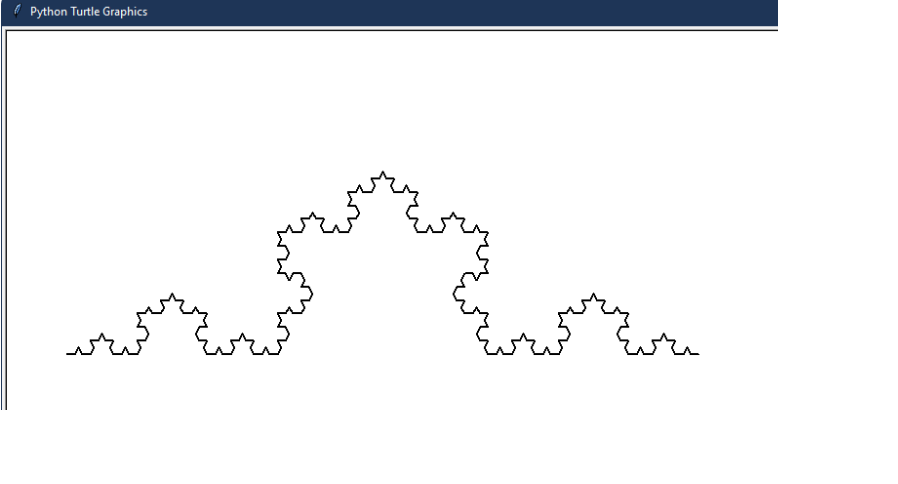

In [5]:
#Кривая Коха

angle = 60
axiom = "F"
rules = {"F": "F+F--F+F" }

it = 0
print("Глубина   Время")
for i in range (5):
    it = it + 1
    start_time = time.perf_counter()
    main(it, axiom, rules, angle, length=8, size=2, y_offset=0, x_offset=100, offset_angle=90, width=1280, height=720)
    print("   ", it, ("    {:.6f} ms    ".format((time.perf_counter() - start_time) * 1000)))
iterations = int(input("Введите глубину (Рек. 4) - "))

main(iterations, axiom, rules, angle, length=8, size=2, y_offset=0, x_offset=100, offset_angle=90, width=1280, height=720)
Image(filename = "Koha.png", width=1000, height=1000)

Глубина   Время
    1     68.737800 ms    
    2     116.390200 ms    
    3     409.089100 ms    
    4     1052.485200 ms    
    5     2593.818400 ms    
Введите глубину (Рек. 5) - 4


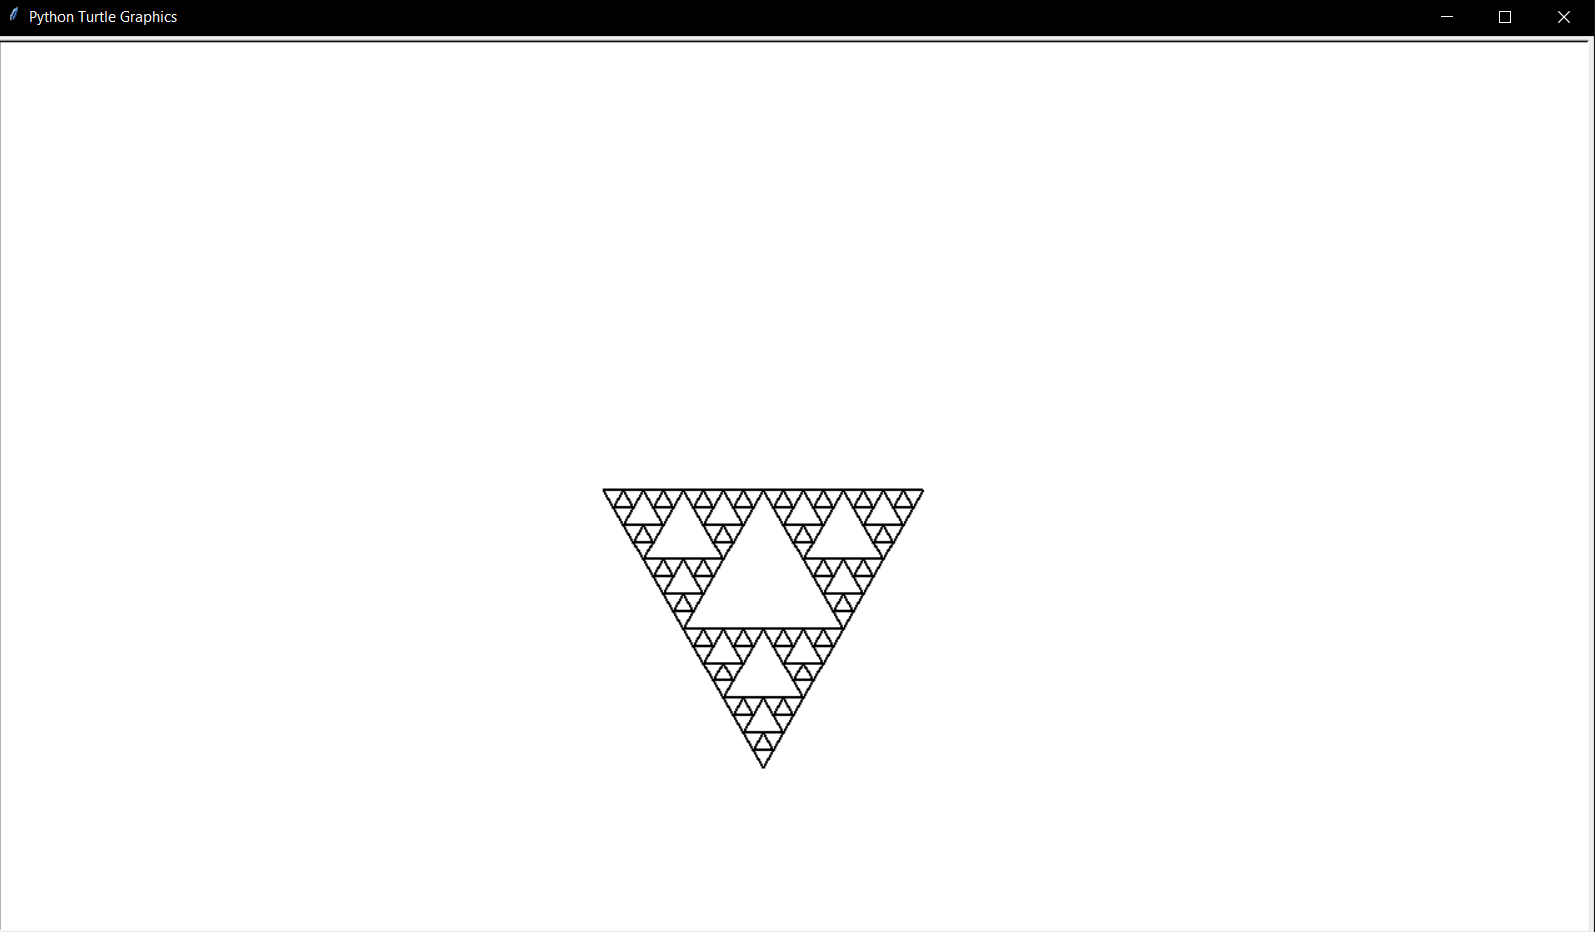

In [4]:
#Салфетка Серпинского

axiom = "FXF--FF--FF"
rules = {"F":"FF", "X":"--FXF++FXF++FXF--"}
angle = 60

it = 0
print("Глубина   Время")
for i in range (5):
    it = it + 1
    start_time = time.perf_counter()
    main(it, axiom, rules, angle, length=8, size=2, y_offset=0, x_offset=100, offset_angle=90, width=1280, height=720)
    print("   ", it, ("    {:.6f} ms    ".format((time.perf_counter() - start_time) * 1000)))


iterations = int(input("Введите глубину (Рек. 5) - "))
main(iterations, axiom, rules, angle, length=8, size=2, y_offset=0, x_offset=0, offset_angle=0, width=450, height=450)
Image(filename = "Serp.png", width=1000, height=1000)

Глубина   Время
    1     102.055100 ms    
    2     66.818100 ms    
    3     265.696900 ms    
    4     1043.204200 ms    
    5     2293.612500 ms    
Введите глубину (Рек. 4) - 4


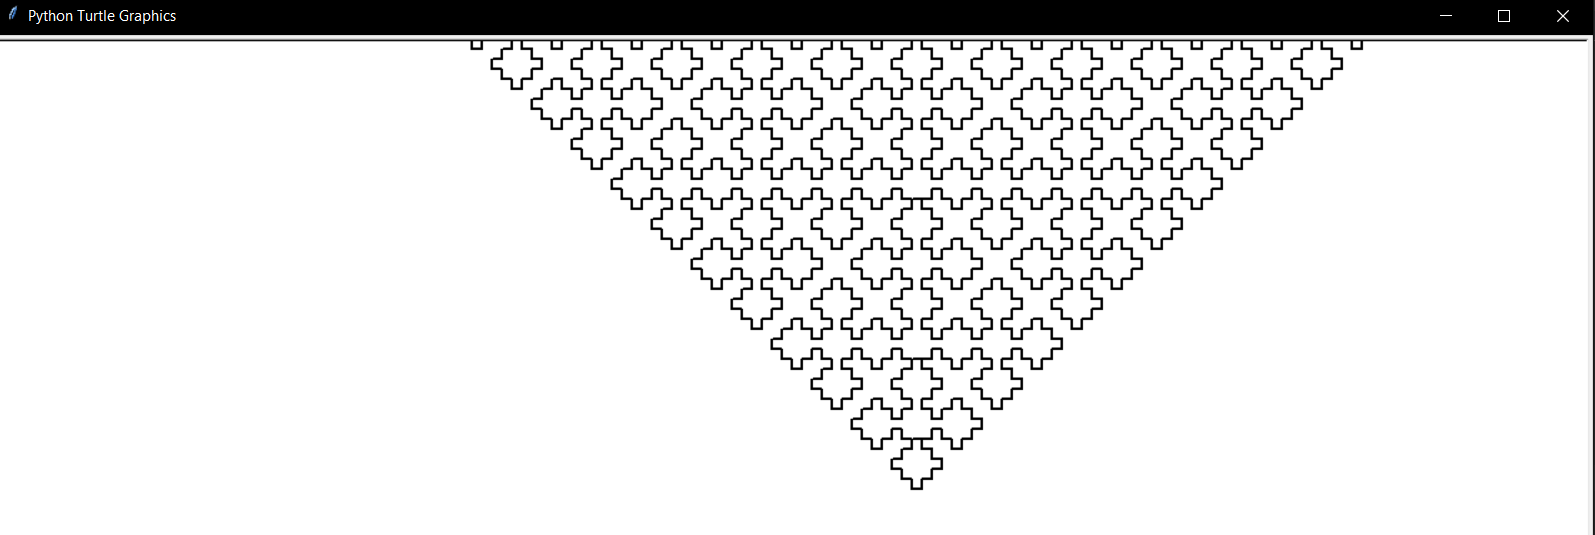

In [6]:
#Кривая Серпинского

axiom = "F+XF+F+XF"
rules = {"X":"XF-F+F-XF+F+XF-F+F-X"}
angle = 90

it = 0
print("Глубина   Время")
for i in range (5):
    it = it + 1
    start_time = time.perf_counter()
    main(it, axiom, rules, angle, length=8, size=2, y_offset=0, x_offset=100, offset_angle=90, width=1280, height=720)
    print("   ", it, ("    {:.6f} ms    ".format((time.perf_counter() - start_time) * 1000)))

iterations = int(input("Введите глубину (Рек. 4) - "))
main(iterations, axiom, rules, angle, length=8, size=2, y_offset=0, x_offset=0, offset_angle=0, width=450, height=450)
Image(filename = "Serp2.png", width=1000, height=1000)

Глубина   Время
    1     89.841200 ms    
    2     14.089700 ms    
    3     56.584400 ms    
    4     231.126800 ms    
    5     968.670400 ms    
Введите глубину (Рек. 5) - 5


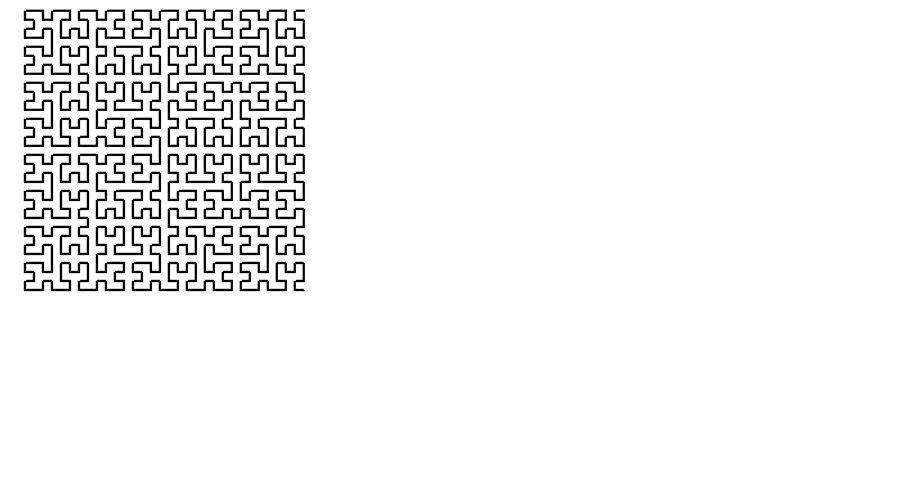

In [4]:
#Кривая Гильберта

axiom = "X"
rules = {"X":"-YF+XFX+FY-", "Y":"+XF-YFY-FX+"}
angle = 90

it = 0
print("Глубина   Время")
for i in range (5):
    it = it + 1
    start_time = time.perf_counter()
    main(it, axiom, rules, angle, length=8, size=2, y_offset=0, x_offset=100, offset_angle=90, width=1280, height=720)
    print("   ", it, ("    {:.6f} ms    ".format((time.perf_counter() - start_time) * 1000)))

iterations = int(input("Введите глубину (Рек. 5) - "))
    
main(iterations, axiom, rules, angle, length=8, size=2, y_offset=0, x_offset=0, offset_angle=0, width=450, height=450)
Image(filename = "Gil.png", width=1000, height=1000)

In [1]:
import turtle
import time

class LSystem2D:
    def __init__(self, t, axiom, width, length, angle):
        self.axiom = axiom      # инициатор
        self.state = axiom      # строка с набором команд для фрактала (вначале это инициатор)
        self.width = width      # толщина линии рисования
        self.length = length    # длина одного линейного сегмента кривой
        self.angle = angle      # фиксированный угол поворота
        self.t = t              # сама черепашка
        self.rules = {}  # словарь для хранения правил формирования кривых
        self.t.pensize(self.width)

    def add_rules(self, *rules):
        for key, value in rules:
            self.rules[key] = value

    def generate_path(self, n_iter):
        for n in range(n_iter):
            for key, value in self.rules.items():
                self.state = self.state.replace(key, value.lower())

            self.state = self.state.upper()

    def set_turtle(self, my_tuple):
        self.t.up()
        self.t.goto(my_tuple[0], my_tuple[1])
        self.t.seth(my_tuple[2])
        self.t.down()

    def draw_turtle(self, start_pos, start_angle):
        
        turtle.tracer(1, 0)     # форсажный режим для черепашки
        self.t.up()                 # черепашка воспаряет над поверхностью (чтобы не было следа)
        self.t.setpos(start_pos)    # начальная стартовая позиция
        self.t.seth(start_angle)    # начальный угол поворота
        self.t.down()               # черепашка опускается на землю
        turtle_stack = []
        
        for move in self.state:                          #Учим черепашку дешифровывать алфавит
            if move == 'F':
                self.t.forward(self.length)
            elif move == 'S':
                self.t.up()
                self.t.forward(self.length)
                self.t.down()
            elif move == '+':
                self.t.left(self.angle)
            elif move == '-':
                self.t.right(self.angle)
            elif move == "[":
                turtle_stack.append((self.t.xcor(), self.t.ycor(), self.t.heading(), self.t.pensize()))
            elif move == "]":
                xcor, ycor, head, w = turtle_stack.pop()
                self.set_turtle((xcor, ycor, head))
                self.width = w
                self.t.pensize(self.width)


        #turtle.done()        # чтобы окно не закрывалось после отрисовки


#Создание окна с размерами 450x450
width = 450
height = 450
screen = turtle.Screen()
screen.setup(width, height, 0, 0)


t = turtle.Turtle()
t.ht()          # скрываем черепашку

pen_width = 2   # толщина линии рисования
f_len = 10      # длина одного сегмента прямой

angle = 33

axiom = "F"


l_sys = LSystem2D(t, axiom, pen_width, f_len, angle)
l_sys.add_rules(("F", "F[+F][-F]"))	

n = 1
print("Глубина   Время")
for i in range (5):
    start_time = time.perf_counter()
    l_sys.generate_path(n)
    print("   ", n, ("    {:.6f} ms    ".format((time.perf_counter() - start_time) * 1000)))
    n = n + 1

    
l_sys = LSystem2D(t, axiom, pen_width, f_len, angle)
l_sys.add_rules(("F", "F[+F][-F]"))
z = int(input("Введите высоту дерева - "))
l_sys.generate_path(z)

Глубина   Время
    1     0.005400 ms    
    2     0.003800 ms    
    3     0.018200 ms    
    4     0.966000 ms    
    5     273.051700 ms    
Введите высоту дерева - 4


### Вывод